In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

# Load specific forecasting tools
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

# Load datasets
df = pd.read_csv('Brazil Temperature.csv', index_col=0, parse_dates=True)
df.index.freq = 'D'
df.head()

,Cases,Temperature
Date,,
2020-03-04,1,26.962963
2020-03-05,4,26.490741
2020-03-06,6,26.370370
2020-03-07,6,25.888889
2020-03-08,6,27.666667


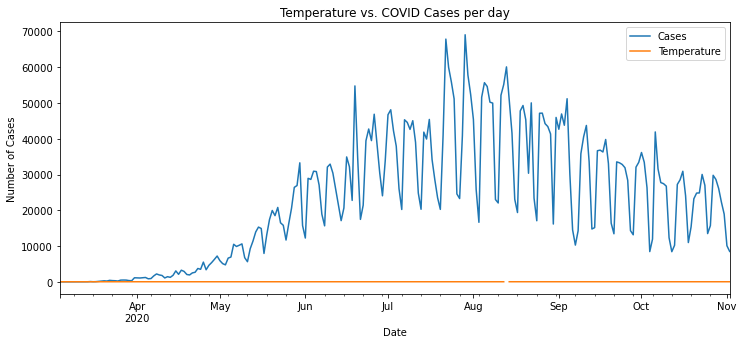

In [2]:
title = 'Temperature vs. COVID Cases per day'
ylabel='Number of Cases'
xlabel=''

ax = df['Cases'].plot(figsize=(12,5),title=title,legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
df['Temperature'].plot(legend=True);

In [3]:
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [4]:
adf_test(df['Cases'],title='Cases')

Augmented Dickey-Fuller Test: Cases
ADF test statistic       -1.581012
p-value                   0.493124
# lags used              15.000000
# observations          228.000000
critical value (1%)      -3.459361
critical value (5%)      -2.874302
critical value (10%)     -2.573571
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [5]:
adf_test(df['Temperature'], title='Temperature')

Augmented Dickey-Fuller Test: Temperature
ADF test statistic       -3.136259
p-value                   0.023984
# lags used               3.000000
# observations          239.000000
critical value (1%)      -3.458011
critical value (5%)      -2.873710
critical value (10%)     -2.573256
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [6]:
df_transformed = df.diff()

In [7]:
df_transformed = df_transformed.dropna()
adf_test(df_transformed['Cases'], title='CasesFirstDiff')
print()
adf_test(df_transformed['Temperature'], title='TemperatureFirstDiff')

Augmented Dickey-Fuller Test: CasesFirstDiff
ADF test statistic     -1.755688e+01
p-value                 4.115428e-30
# lags used             5.000000e+00
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: TemperatureFirstDiff
ADF test statistic     -9.282191e+00
p-value                 1.242517e-15
# lags used             5.000000e+00
# observations          2.350000e+02
critical value (1%)    -3.458487e+00
critical value (5%)    -2.873919e+00
critical value (10%)   -2.573367e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [8]:
df_transformed = df_transformed.diff().dropna()
adf_test(df_transformed['Cases'], title='CasesSecondDiff')
print()
adf_test(df_transformed['Temperature'], title='TemperatureSecondDiff')

Augmented Dickey-Fuller Test: CasesSecondDiff
ADF test statistic     -9.371974e+00
p-value                 7.336063e-16
# lags used             1.300000e+01
# observations          2.260000e+02
critical value (1%)    -3.459620e+00
critical value (5%)    -2.874415e+00
critical value (10%)   -2.573632e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary

Augmented Dickey-Fuller Test: TemperatureSecondDiff
ADF test statistic     -8.493495e+00
p-value                 1.294403e-13
# lags used             1.100000e+01
# observations          2.280000e+02
critical value (1%)    -3.459361e+00
critical value (5%)    -2.874302e+00
critical value (10%)   -2.573571e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [9]:
nobs=7
train, test = df_transformed[0:-nobs], df_transformed[-nobs:]

In [10]:
from statsmodels.tsa.api import VAR
for i in range(31):
    model = VAR(train)
    results = model.fit(i)
    print('Order =', i)
    print('AIC: ', results.aic)
    print('BIC: ', results.bic)
    print()

Order = 0
AIC:  20.97262403130113
BIC:  21.002246678971222

Order = 1
AIC:  20.400963061010263
BIC:  20.490102820622322

Order = 2
AIC:  20.140996183993074
BIC:  20.290018595703977

Order = 3
AIC:  19.957802058855716
BIC:  20.16707645157278

Order = 4
AIC:  19.86002853365196
BIC:  20.12992807978286

Order = 5
AIC:  19.516169401337784
BIC:  19.84707117255269

Order = 6
AIC:  19.153155229577308
BIC:  19.545440253606014

Order = 7
AIC:  18.99487974019608
BIC:  19.44893305868355

Order = 8
AIC:  18.87770847319569
BIC:  19.39391920063991

Order = 9
AIC:  18.821412456552924
BIC:  19.40017384034976

Order = 10
AIC:  18.806300291665536
BIC:  19.44800977328583

Order = 11
AIC:  18.821927322027275
BIC:  19.526986599352163

Order = 12
AIC:  18.839472008233862
BIC:  19.608287099074985

Order = 13
AIC:  18.816495892529602
BIC:  19.649477199361545

Order = 14
AIC:  18.772448033403208
BIC:  19.670010409336342

Order = 15
AIC:  18.807057160972057
BIC:  19.76961997699464

Order = 16
AIC:  18.8377347770

In [11]:
results = model.fit(8)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 02, Dec, 2020
Time:                     16:17:37
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    19.3939
Nobs:                     225.000    HQIC:                   19.0861
Log likelihood:          -2728.26    FPE:                1.58028e+08
AIC:                      18.8777    Det(Omega_mle):     1.36606e+08
--------------------------------------------------------------------
Results for equation Cases
                    coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------------
const                 16.747225       505.778201            0.033           0.974
L1.Cases              -1.267573         0.064819          -19.555           0.000
L1.Temperature       755.610247       338.348474        

In [12]:
lag_order = results.k_ar
lag_order

8

In [13]:
z = results.forecast(y=train.values[-lag_order:], steps=7)
z

array([[ 8.47191603e+03, -2.85462543e+00],
       [-8.24778291e+03,  1.50318725e+00],
       [-3.09583449e+03,  4.30636168e-01],
       [ 3.58487484e+03, -4.01633513e-01],
       [-8.95068465e+03, -6.73538173e-01],
       [-7.35926666e-01,  1.23333120e-01],
       [ 8.21345046e+03,  7.61714634e-01]])

In [14]:
test

,Cases,Temperature
Date,,
2020-10-27,11828.0,-1.233334
2020-10-28,-15219.0,-2.825926
2020-10-29,-1365.0,1.996297
2020-10-30,-1301.0,2.303703
2020-10-31,489.0,-4.124073
2020-11-01,-5512.0,2.959258
2020-11-02,7248.0,1.479631


In [15]:
idx = pd.date_range('27/10/2020', periods=7, freq='D')
df_forecast = pd.DataFrame(z, index=idx, columns=['Cases2d','Temperature2d'])
df_forecast

,Cases2d,Temperature2d
2020-10-27,8471.916031,-2.854625
2020-10-28,-8247.782915,1.503187
2020-10-29,-3095.834487,0.430636
2020-10-30,3584.874839,-0.401634
2020-10-31,-8950.684650,-0.673538
2020-11-01,-0.735927,0.123333
2020-11-02,8213.450464,0.761715


In [16]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Cases1d'] = (df['Cases'].iloc[-nobs-1]-df['Cases'].iloc[-nobs-2]) + df_forecast['Cases2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['CasesForecast'] = df['Cases'].iloc[-nobs-1] + df_forecast['Cases1d'].cumsum()

In [17]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
df_forecast['Temperature1d'] = (df['Temperature'].iloc[-nobs-1]-df['Temperature'].iloc[-nobs-2]) + df_forecast['Temperature2d'].cumsum()

# Now build the forecast values from the first difference set
df_forecast['TemperatureForecast'] = df['Temperature'].iloc[-nobs-1] + df_forecast['Temperature1d'].cumsum()

In [18]:
df_forecast

,Cases2d,Temperature2d,Cases1d,CasesForecast,Temperature1d,TemperatureForecast
2020-10-27,8471.916031,-2.854625,10704.916031,26430.916031,-1.387958,27.767598
2020-10-28,-8247.782915,1.503187,2457.133116,28888.049147,0.115229,27.882826
2020-10-29,-3095.834487,0.430636,-638.701370,28249.347777,0.545865,28.428691
2020-10-30,3584.874839,-0.401634,2946.173468,31195.521245,0.144231,28.572923
2020-10-31,-8950.684650,-0.673538,-6004.511182,25191.010063,-0.529307,28.043616
2020-11-01,-0.735927,0.123333,-6005.247108,19185.762955,-0.405974,27.637643
2020-11-02,8213.450464,0.761715,2208.203356,21393.966310,0.355741,27.993384


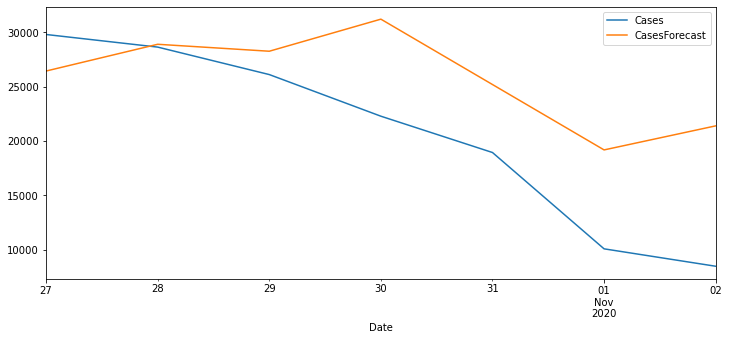

In [19]:
df['Cases'][-nobs:].plot(figsize=(12,5),legend=True).autoscale(axis='x',tight=True)
df_forecast['CasesForecast'].plot(legend=True);